# Time Series Decomposition & Analysis Assignment

In [2]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

### Import the monthly sunspots data set into a Pandas dataframe, and convert the Month field to a datetime data type.

In [3]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%203/monthly-sunspots.csv')

In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3


### Use a line chart to plot the time series.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



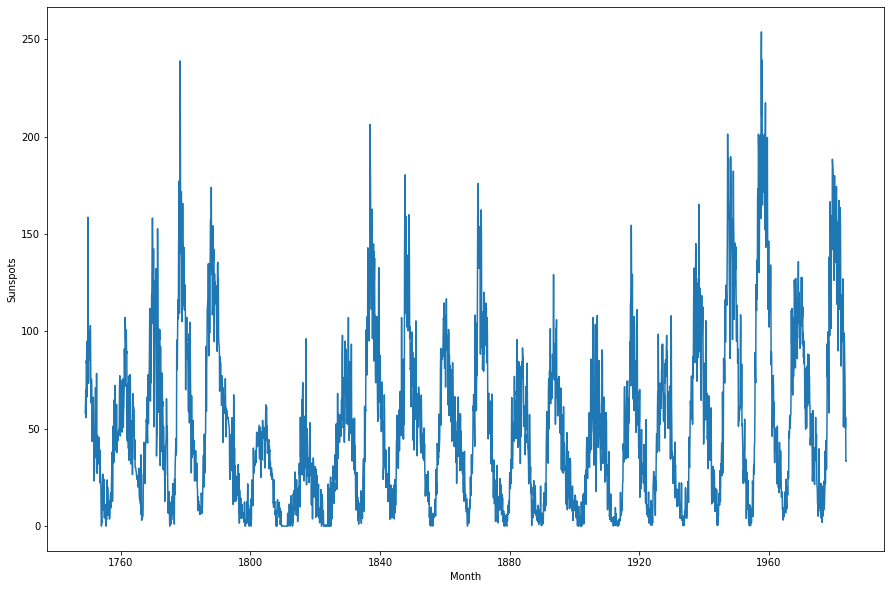

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(df.Month, df.Sunspots)

### Decompose the time series and add columns for the trend, seasonality, and residuals to the data set.

In [20]:
decomp = sm.tsa.seasonal_decompose(df['Sunspots'], model='additive', freq=252)
trend = decomp.trend.reset_index()
season = decomp.seasonal.reset_index()
residual = decomp.resid.reset_index()

merged = pd.concat([df, trend.Sunspots, season.Sunspots, residual.Sunspots], axis=1)
merged.columns = ['Date', 'Sunspots', 'Trend', 'Seasonality', 'Residuals']
merged

,Date,Sunspots,Trend,Seasonality,Residuals
0,1749-01-01,58.0,NaN,14.405719,NaN
1,1749-02-01,62.6,NaN,15.021334,NaN
2,1749-03-01,70.0,NaN,13.513239,NaN
3,1749-04-01,55.7,NaN,6.423298,NaN
4,1749-05-01,85.0,NaN,12.916790,NaN
...,...,...,...,...,...
2815,1983-08-01,71.8,NaN,-17.840630,NaN
2816,1983-09-01,50.3,NaN,-13.035154,NaN
2817,1983-10-01,55.8,NaN,-9.122416,NaN
2818,1983-11-01,33.3,NaN,-10.499261,NaN


### Plot the observed values, trend, seasonality, and residuals on a multi-line chart. You should have a line for each column.

**Hint:** You may need to melt the data so that all the categories are in a single column and all the values are in a single column.

In [21]:
def ilinechart(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none').update(layout=dict(title=dict(x=0.5)))

    fig.show()
melted = pd.melt(merged, 
                 id_vars='Date', 
                 value_vars=['Sunspots', 'Trend', 'Seasonality', 'Residuals'], 
                 var_name='Variable', 
                 value_name='Value')

melted.head()

,Date,Variable,Value
0,1749-01-01,Sunspots,58.0
1,1749-02-01,Sunspots,62.6
2,1749-03-01,Sunspots,70.0
3,1749-04-01,Sunspots,55.7
4,1749-05-01,Sunspots,85.0


In [22]:
ilinechart(melted, 'Date', 'Value', groups='Variable', title='Observed Sunspots vs Components')

### Add two columns to the data set - one that calculates a rolling mean and another that calculates a rolling standard deviation.

In [24]:
merged['Rolling_Mean'] = merged['Sunspots'].rolling(window=252).mean()
merged['Rolling_Std'] = merged['Sunspots'].rolling(window=252).std()

### Plot the rolling mean and standard deviation on a multi-line chart along with the observed values.

In [25]:
melted2 = pd.melt(merged, 
                 id_vars='Date', 
                 value_vars=['Sunspots', 'Rolling_Mean', 'Rolling_Std'], 
                 var_name='Variable', 
                 value_name='Value')

ilinechart(melted2, 'Date', 'Value', groups='Variable', title='Rolling Mean & Standard Deviation')

### Perform an Augmented Dickey Fuller Test on the data set and determine whether this time series is stationary.

In [26]:
adf_test = sm.tsa.stattools.adfuller(merged['Sunspots'])

adf_test

(-9.567667511913076,
 2.333452143866306e-16,
 27,
 2792,
 {'1%': -3.432694313168895,
  '10%': -2.5673213632123297,
  '5%': -2.862575752726396},
 23141.276837258665)

In [28]:
results = pd.Series(adf_test[0:4], 
                    index=['ADF Test Statistic',
                            'P-Value', 
                            '# Lags Used',
                            '# Observations Used'])
for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value
results

ADF Test Statistic    -9.567668e+00
P-Value                2.333452e-16
# Lags Used            2.700000e+01
# Observations Used    2.792000e+03
Critical Value 1%     -3.432694e+00
Critical Value 5%     -2.862576e+00
Critical Value 10%    -2.567321e+00
dtype: float64

### Generate an autocorrelation plot for the data set to determine the level of autocorrelation in this time series.

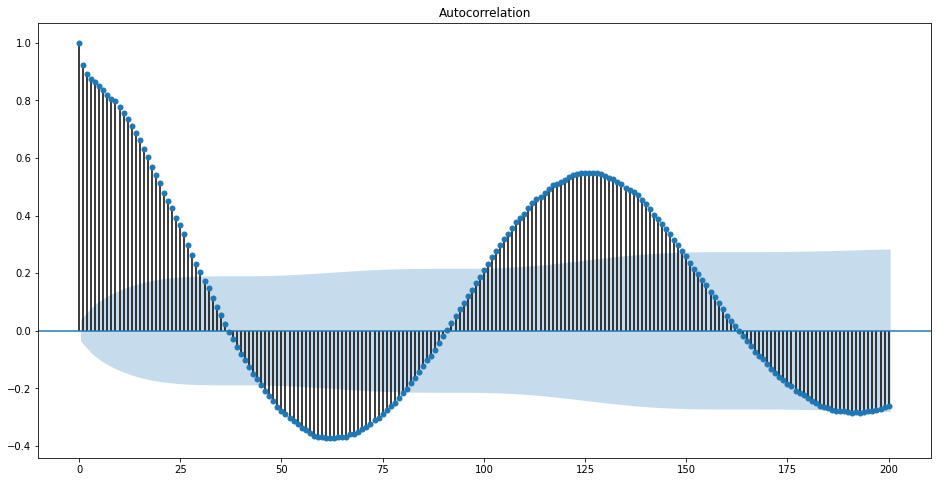

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

series = df.set_index('Month')
fig = plot_acf(series, lags=200)